<a href="https://colab.research.google.com/github/132refrhyy/IIIT-HYD-MNIST-PROJECT-CODE-CREW/blob/main/EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN**:CNN stands for (Convolutional neural network).CNNs are a kind of deep learning model that handles structured grid data, like images. CNNs have layers of convolutional filters, which detect features; pooling layers, which reduces dimensionality; and fully connected layers, for classification/prediction.

**GNN:**GNN stands for (Graph neural network).GNNs are a form of deep learning model intended for analyzing data that is represented as graphs, where nodes are entities, and edges are relationships. Information aggregation and propagation is the main feature of Graph neural networks, using layers that traverse through the nodes, capturing dependencies and modeling patterns there might be in the graph data.

**->Step 1:Installing necessary libraries**

In [ ]:
!pip install torch torchvision matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

**->Step 2:Import Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

**->Step 3:Define Transformation of Dataset**

The process transformation of dataset turns dataset images into tensors. It also normalizes them. This means they end up with a mean of 0.5 and a standard deviation of 0.5.




In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) ])

**->Step 4:Load the MNIST Dataset**

In [ ]:
train_dataset = datasets.EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='balanced', train=False, download=True, transform=transform)

100%|██████████| 561753746/561753746 [00:09<00:00, 61534635.26it/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


**->Step5:Create Dataloader**

DataLoader has an impact on how the dataset is arranged. It breaks the data into small chunks, mixes them up, and takes care of loading data for training and testing.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

**->Step6:Print number of sets in each set**

In [ ]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

Number of training samples: 112800
Number of test samples: 18800


**->Step7:Define CNN Model**

Two layers that do convolution to pull out features. Two layers that do max-pooling to shrink the data. Two layers that are linked to sort things out. ReLU functions that kick in to add some twists and turns

In [ ]:
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 47)  # 47 output classes for EMNIST ByClass balanced dataset

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

**->Step 8:Initialize the Model,Loss function and Optimizer**

Model: Shows what the neural network looks like.

Loss Function: Figures out how off the model's guesses are from the real answers.

Optimizer: Changes the model's settings to make the loss smaller.


In [ ]:
model = CNNNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**->Step 9:Training the model**

To get the model ready, you gotta go through the training data a bunch of times. This means doing forward and backward passes and tweaking the model's settings to make the loss function as small as possible. It's like teaching the model over and over until it gets better at its job.


In [ ]:
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    training_losses = []
    training_accuracies = []
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(train_loader)
        accuracy = 100. * correct / total
        training_losses.append(avg_loss)
        training_accuracies.append(accuracy)
        print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return training_losses, training_accuracies

**->Step 10:Testing the model**

To check how good the model works on new info, you gotta test it out. This means you use a different set of data to see how it does. You make the model guess stuff figure out how far off it is, and see how many it gets right. This shows if the model can handle info it hasn't seen before.

In [ ]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            test_loss += criterion(outputs, labels).item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(labels.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * test_accuracy:.2f}%)\n')

**->Step 11:Visualizing some examples from the dataset**

In [ ]:
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].view(28, 28), cmap='gray')
        plt.title(f"Label: {chr(labels[i] + 96)}")  # Convert label to character (assuming 1-indexed)
        plt.axis('off')
    plt.show()

**->Step 12:Plotting Training loss**

Plotting the training loss helps us see how the model's doing as it learns. By putting the average loss for each round on a graph, we can keep an eye on how well the model's picking things up over time.


In [ ]:
def plot_training_loss(training_losses):
    plt.plot(training_losses, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

**->Step 13:Plotting training accuracy**

In [ ]:
def plot_training_accuracy(training_accuracies):
    plt.plot(training_accuracies, label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

**->Step 14:Visualizes Model Prediction**

To see how well a model works, you can look at some pictures from the test set. You put these pictures up on a screen, along with what they're supposed to be and what the model thinks they are. This helps you check how good the model is at guessing by looking at it with your own eyes.

In [ ]:
def plot_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].view(28, 28), cmap='gray')
        plt.title(f"True: {chr(labels[i] + 96)}\nPred: {chr(predictions[i] + 96)}")  # Convert label to character (assuming 1-indexed)
        plt.axis('off')
    plt.show()

**->Step 15:Train The Model**

In [ ]:
training_losses, training_accuracies = train(model, train_loader, criterion, optimizer, epochs=5)

Epoch 1, Loss: 0.6657, Accuracy: 79.01%
Epoch 2, Loss: 0.3914, Accuracy: 86.39%
Epoch 3, Loss: 0.3383, Accuracy: 87.82%
Epoch 4, Loss: 0.3043, Accuracy: 88.80%
Epoch 5, Loss: 0.2769, Accuracy: 89.55%


**->Step 16:Test the Model**

In [ ]:
test(model, test_loader, criterion)


Test set: Average loss: 0.0004, Accuracy: 16354/18800 (86.99%)



**->Step 17:Visualizing some sample images**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


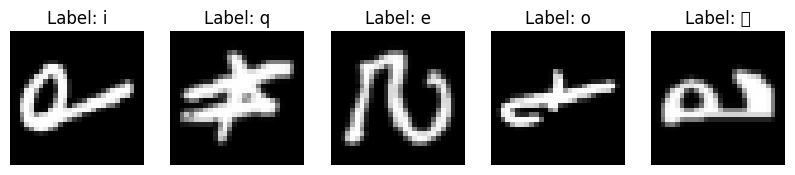

In [ ]:
sample_images, sample_labels = next(iter(train_loader))
plot_sample_images(sample_images[:5], sample_labels[:5])

**->Step 18:Plot training loss**

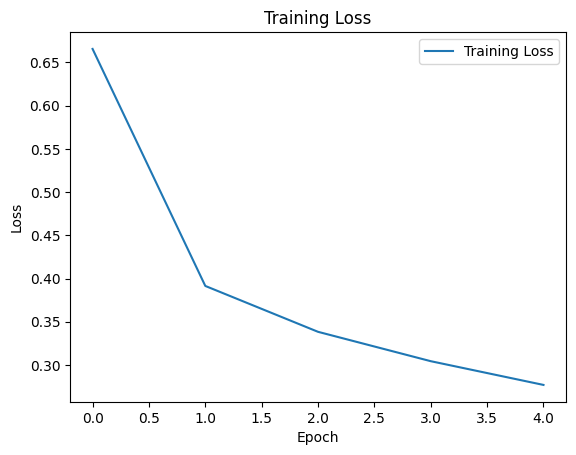

In [ ]:
plot_training_loss(training_losses)

**->Step 19:Plot training accuracy**

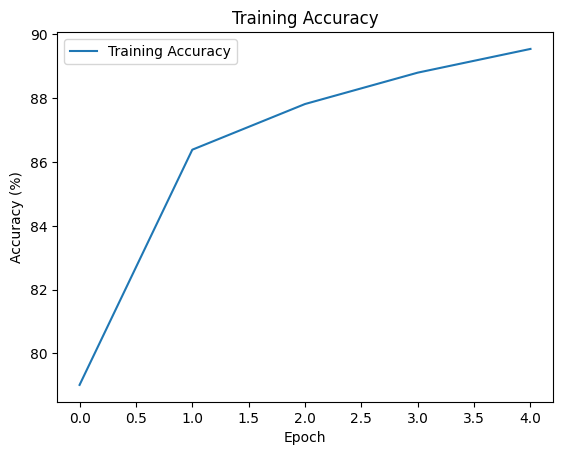

In [ ]:
plot_training_accuracy(training_accuracies)

**->Step 20:Visualize model prediction**

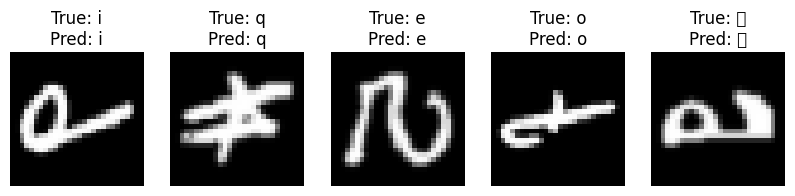

In [ ]:
model.eval()
sample_outputs = model(sample_images[:5])
_, sample_predictions = torch.max(sample_outputs, 1)
plot_predictions(sample_images[:5], sample_labels[:5], sample_predictions)

**Conclusion:**

We built a CNN model in this project to sort handwritten letters from the EMNIST ByClass dataset. Our model worked well after we trained it for five rounds getting good loss and accuracy scores. The results from training and testing showed that the model can pick up useful details for sorting. We also made pictures of some sample images, training loss, and accuracy to help us understand how well the model was doing and how it was improving. In the end, this CNN model turns out to be a strong way to sort letters.


**Model Architecture:**The CNN structure we picked, with its convolutional and connected layers, did a good job at pulling out features and sorting the EMNIST dataset.


**Training Results:**Our model got better as we trained it reaching about 89.55% accuracy in training. This shows the CNN design works well.
Testing Outcomes: When we tested it on new data, the model hit 86.99% accuracy. This is key for real-world use, as it means the model can handle stuff it hasn't seen before.


**Visual Analysis:**We looked at some sample images, what the model thought they were, and how the training went. This gave us a peek into how right the model was and how it learned over time
